#### Library Imports

In [106]:
# Importing all libraries required.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# setting display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

## Business Understanding 

**Business Objective :** The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

<br>
<br>

## Data Understanding

####    Reading Files

In [107]:
#Reading data from csv file using pandas
loans_df = pd.read_csv("loan.csv")
loans_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [108]:
# checking shape & datatype of loans_df dataframe
loans_df.shape

(39717, 111)

In [109]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [110]:
loans_df.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

**Data Duplication Check**

In [111]:
# Checking for duplicate rows in dataset based on id column
loans_df.duplicated(subset=None, keep='first').count()

39717

In [112]:
dup=loans_df[loans_df.duplicated(['id'])]
dup.count()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                              0
purpose                           0
title                             0
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

There are no duplicate rows in loan dataset

**Missing/Null Values Identification**

In [113]:
#Missing values per column expressed as % of total number of values
missing = round(100*(loans_df.isnull().sum()/len(loans_df.id)), 2)
missing.loc[missing > 0]

emp_title                           6.19
emp_length                          2.71
desc                               32.58
title                               0.03
mths_since_last_delinq             64.66
mths_since_last_record             92.99
revol_util                          0.13
last_pymnt_d                        0.18
next_pymnt_d                       97.13
last_credit_pull_d                  0.01
collections_12_mths_ex_med          0.14
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m     

In [114]:
missing.loc[missing != 100]

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [115]:
missing.loc[missing >= 100].count()

54

In [116]:
missing.loc[missing >= 50].count()

57

There are 54 columns which are having 100% null values and more than 50% is 57, these 57 can be dropped and the remaining 54 can be evaluated for Business usecase as discussed below.

## Data Cleaning

In [117]:
#dropping columns with missing values > 50%
missing_cols = list(missing[missing >= 50].index)

loans_df = loans_df.drop(missing_cols,axis=1)
loans_df.shape

(39717, 54)

We are left with 54 columns, now looking further for columns with unique or single values in them.

In [118]:
unique_cols = loans_df.nunique()
print(unique_cols)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

After looking at these columns with single values,dropping them as they will be of no use for analysis.

In [119]:
#finding single valued cols
single_val_col = unique_cols[unique_cols.values == 1]
single_val_col.index

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'], dtype='object')

Dropping them.

In [120]:
loans_df.drop(columns = list(single_val_col.index), inplace=True)
loans_df.shape

(39717, 45)

Dropping the desc column as an equivalent short and concise info is already present in the purpose and title column of the data.

In [121]:
loans_df = loans_df.drop('desc',axis=1)
loans_df.shape

(39717, 44)

Now we are left with 44 columns only.

As per the objective company is more interested to know which loan applications will turn into defaulters. Hence, we cand drop the fields that are created after a loan application is approved as it doesn't make any sense for our analysis. 

Also, fields like id, member_id & url are unique and different for each application thats why doesn't help much here in analysis and can be dropped too.

Now zip_code could have been useful but it contains only partial data which might impute our analysis negatively. Therefore, dropping all these columns mentioned above.

In [122]:
#dropping all above discussed columns
del_cols = ["id","member_id","url","zip_code","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",
            "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
            "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"]
loans_df.drop(columns=del_cols, inplace=True)
loans_df.shape

(39717, 28)

**Missing Value Imputation and dropping NA less than 5%**

In [123]:
#Looking at the missing values again
missing = round(100*(loans_df.isnull().sum()/len(loans_df.index)), 2) 
missing[missing !=0]
#missing[(missing>0) & (missing < 50)]

emp_title               6.19
emp_length              2.71
title                   0.03
revol_util              0.13
pub_rec_bankruptcies    1.75
dtype: float64

In [124]:
#Dropping the na values for missing values in columns which are less than 2%
loans_df=loans_df[~loans_df.title.isnull()]
loans_df=loans_df[~loans_df.revol_util.isnull()]
loans_df=loans_df[~loans_df.pub_rec_bankruptcies.isnull()]

In [125]:
#Imputing 'emp_length' and 'emp_title' with 0 & unknown respectively as we might lose some information dropping them
loans_df.emp_length.fillna('0',inplace=True)
loans_df.emp_title.fillna('Unknown',inplace=True)

**Further Formatting and cleaning Data for ease of use in analysis**

In [126]:
## Data cleaning
# Removing % symbol from intrest rate column for further use
loans_df['int_rate'] = loans_df['int_rate'].str.rstrip('%')

# Removing % symbol from revol_util column for further use
loans_df['revol_util'] = loans_df['revol_util'].str.rstrip('%')

In [127]:
loans_df.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', '0'],
      dtype=object)

In [128]:
#Formatting employment length column to have only numbers, which will help in analysis
loans_df['emp_length']=loans_df.emp_length.str.extract('(\d+)')
loans_df.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Unknown,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,0.0


In [129]:
#Looking at columns with dtype 'object'
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38959 entries, 0 to 39680
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38959 non-null  int64  
 1   funded_amnt           38959 non-null  int64  
 2   funded_amnt_inv       38959 non-null  float64
 3   term                  38959 non-null  object 
 4   int_rate              38959 non-null  object 
 5   installment           38959 non-null  float64
 6   grade                 38959 non-null  object 
 7   sub_grade             38959 non-null  object 
 8   emp_title             38959 non-null  object 
 9   emp_length            38959 non-null  object 
 10  home_ownership        38959 non-null  object 
 11  annual_inc            38959 non-null  float64
 12  verification_status   38959 non-null  object 
 13  issue_d               38959 non-null  object 
 14  loan_status           38959 non-null  object 
 15  purpose            

In [130]:
# converting amount columns into numeric data to find some correlation among important ones.

numeric_cols = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length']
loans_df[numeric_cols] = loans_df[numeric_cols].apply(pd.to_numeric)

In [131]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38959 entries, 0 to 39680
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38959 non-null  int64  
 1   funded_amnt           38959 non-null  int64  
 2   funded_amnt_inv       38959 non-null  float64
 3   term                  38959 non-null  object 
 4   int_rate              38959 non-null  float64
 5   installment           38959 non-null  float64
 6   grade                 38959 non-null  object 
 7   sub_grade             38959 non-null  object 
 8   emp_title             38959 non-null  object 
 9   emp_length            38959 non-null  int64  
 10  home_ownership        38959 non-null  object 
 11  annual_inc            38959 non-null  float64
 12  verification_status   38959 non-null  object 
 13  issue_d               38959 non-null  object 
 14  loan_status           38959 non-null  object 
 15  purpose            

In [132]:
loans_df.shape

(38959, 28)

In [133]:
#We can drop off the rows with loan_status = Current as it does not help in our analysis.
loans_df=loans_df[~(loans_df.loan_status=="Current")]
loans_df.shape

(37819, 28)

In [134]:
#Now Looking at another important variable purpose of loan in total loans issued
(loans_df.purpose.value_counts()*100)/len(loans_df.index)

debt_consolidation    46.931437
credit_card           13.025199
other                  9.902430
home_improvement       7.461858
major_purchase         5.616225
small_business         4.489807
car                    3.913377
wedding                2.395621
medical                1.771596
moving                 1.493958
vacation               0.973056
house                  0.957191
educational            0.798540
renewable_energy       0.269706
Name: purpose, dtype: float64

 Observations - <br>
 Most of the loans were taken for debt consolidation(47.81%) and Credit card bill payment(13.06%)
<br> Other(9.79%) is also one of the main areas where loans were taken.

# Derived Columns For Analysis

In [135]:
# Extracting year and month
loans_df.issue_d = pd.to_datetime(loans_df.issue_d, format='%b-%y')
loans_df['year']=loans_df['issue_d'].dt.year
loans_df['month']=loans_df['issue_d'].dt.month

loans_df.head(1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,year,month
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Unknown,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,0.0,2011,12


In [136]:
# Deriving Loan to Salary ratio
loans_df['salToLoanRatio'] = loans_df['loan_amnt']/loans_df['annual_inc']
loans_df.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,year,month,salToLoanRatio
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Unknown,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,0.0,2011,12,0.208333
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,0.0,2011,12,0.083333
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Unknown,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,real estate business,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10,0.0,2011,12,0.195886


# Univariate Analysis

In [137]:
# Function for data labels
def adding_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [138]:
# Function for charged off percentage
def chargedOffPercentagePlot(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    #print(grp)
    percentages = grp.unstack() * 100 / cnt.T
    #print(percentages)
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    showLabels(ax, grp[loanstatus].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

In [139]:
# Function for labels
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


In [140]:
#Checking loan_amnt column
loans_df['loan_amnt'].describe()

count    37819.000000
mean     11075.930749
std       7364.134409
min        500.000000
25%       5400.000000
50%       9750.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='loan_amnt'>

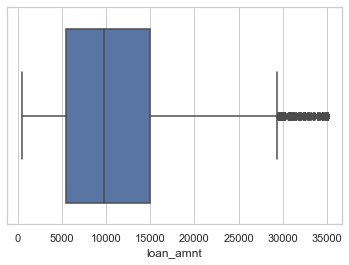

In [141]:
sns.boxplot(loans_df.loan_amnt)

In [142]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37819 entries, 0 to 39680
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             37819 non-null  int64         
 1   funded_amnt           37819 non-null  int64         
 2   funded_amnt_inv       37819 non-null  float64       
 3   term                  37819 non-null  object        
 4   int_rate              37819 non-null  float64       
 5   installment           37819 non-null  float64       
 6   grade                 37819 non-null  object        
 7   sub_grade             37819 non-null  object        
 8   emp_title             37819 non-null  object        
 9   emp_length            37819 non-null  int64         
 10  home_ownership        37819 non-null  object        
 11  annual_inc            37819 non-null  float64       
 12  verification_status   37819 non-null  object        
 13  issue_d         

##### Univariate Analysis - Unordered Categorical Variables - Loan Status

Text(0.5, 0, 'Loan Status')

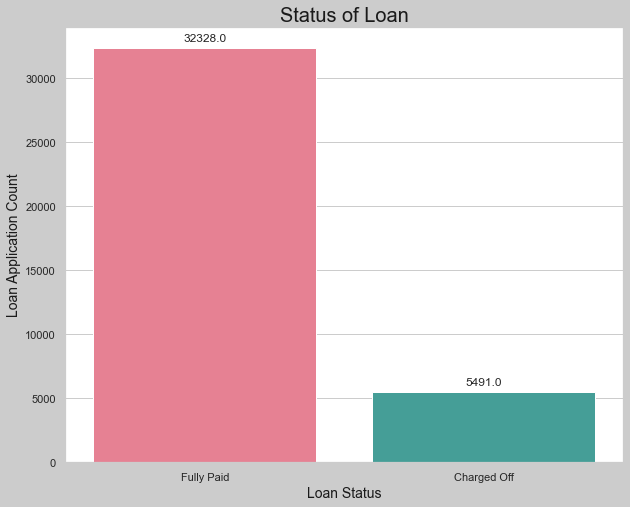

In [143]:
plt.figure(figsize=(10,8),facecolor='0.8')
uni_loan_status_plot = sns.countplot(x="loan_status",data=loans_df,palette='husl')
adding_labels(uni_loan_status_plot)
uni_loan_status_plot.set_title('Status of Loan',fontsize=20,color='k')
uni_loan_status_plot.set_ylabel('Loan Application Count',fontsize=14,color = 'k')
uni_loan_status_plot.set_xlabel('Loan Status',fontsize=14,color = 'k')      

**Inference -** <br>
30424 loans were fully paid.
<br>5003 loans were charged off.

In [144]:
# Also looking at important variable loan status in total loans issued
(loans_df.loan_status.value_counts()*100)/len(loans_df.index)

Fully Paid     85.480843
Charged Off    14.519157
Name: loan_status, dtype: float64

Observations - <br>
85.5% loans were fully paid.
<br>Close to 14.5% loans were charged off

##### Univariate Analysis - Unordered Categorical Variables - Purpose Of Loan

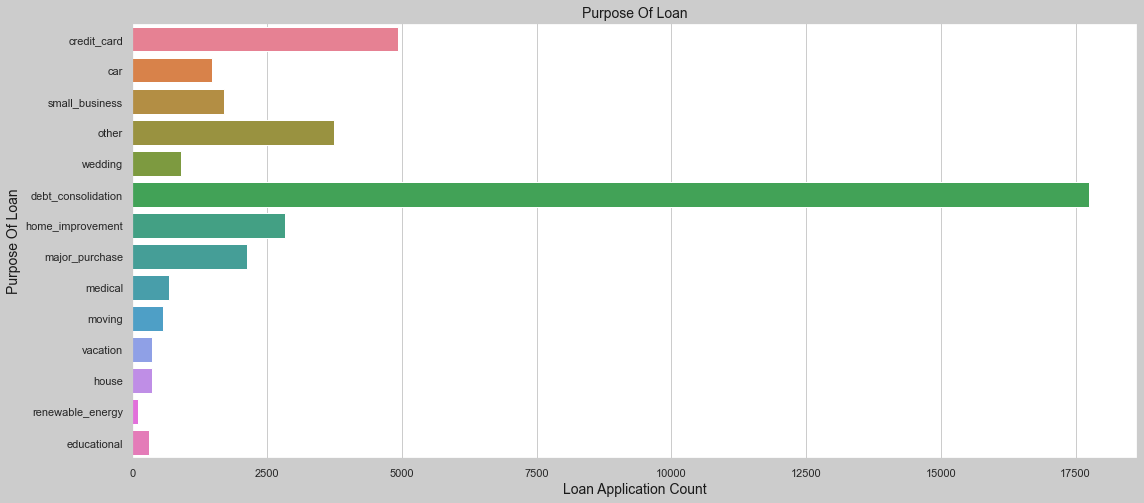

In [145]:
plt.figure(figsize=(18,8),facecolor='0.8')
sns.set_style("whitegrid")
uni_purpose_plot = sns.countplot(y="purpose",data=loans_df,palette='husl')
uni_purpose_plot.set_title('Purpose Of Loan',fontsize=14,color='k')
uni_purpose_plot.set_ylabel('Purpose Of Loan',fontsize=14,color = 'k')
uni_purpose_plot.set_xlabel('Loan Application Count',fontsize=14,color = 'k')      
plt.show()

**Inference -**
It is clear from the above plot that most of the loans were taken for the purpose of debt consolidation & paying credit card bill.

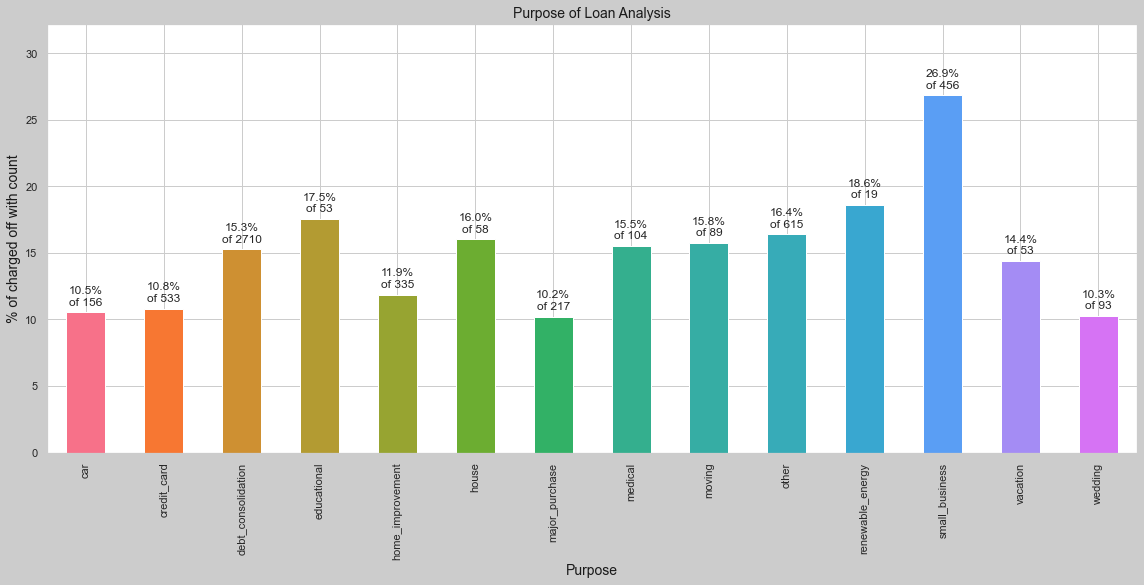

In [146]:
plt.figure(figsize=(16,8),facecolor='0.8')
ax2 = chargedOffPercentagePlot(loans_df,'purpose')
ax2.set_title('Purpose of Loan Analysis',fontsize=14,color='k')
ax2.set_xlabel('Purpose',fontsize=14,color = 'k')
ax2.set_ylabel('% of charged off with count',fontsize=14,color = 'k') 

plt.show()

**Inference -**
It is clear from the above plot that most of the defaulters took loan with the purpose of small business.

##### Univariate Analysis - Unordered Categorical Variables - Home Ownership


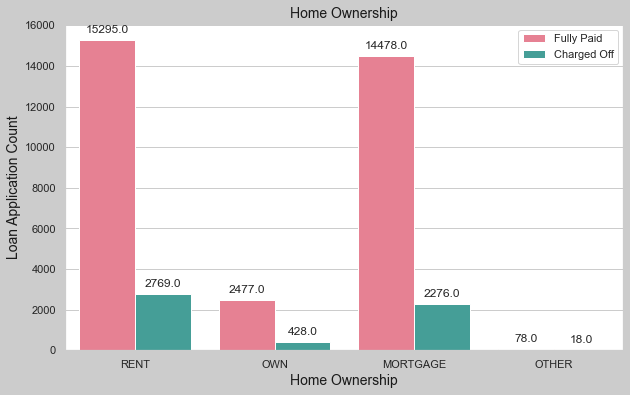

In [147]:
plt.figure(figsize=(10,6),facecolor='0.8')
ax = sns.countplot(x="home_ownership",data=loans_df,hue='loan_status',palette='husl')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='k')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'k')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'k') 
adding_labels(ax)
plt.show()

<AxesSubplot:xlabel='home_ownership', ylabel='% of loans Charged Off'>

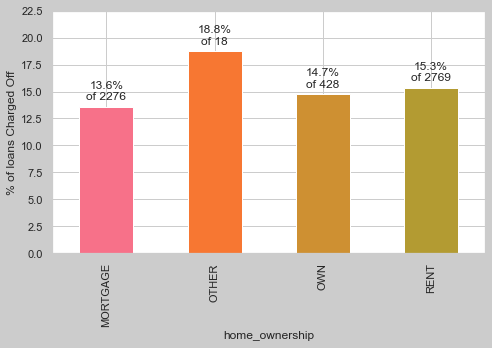

In [148]:
plt.figure(figsize=(7,5),facecolor='0.8')
chargedOffPercentagePlot(loans_df,'home_ownership')

**Inference -**
It is clear from the above plot that there is uniform distribution of defaulters among all categories of Home .

##### Univariate Analysis - Unordered Categorical Variables - Term

<AxesSubplot:xlabel='term', ylabel='% of loans Charged Off'>

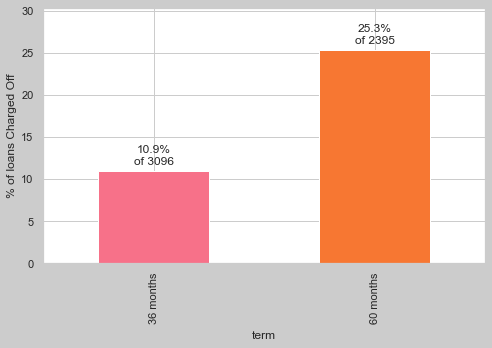

In [149]:
plt.figure(figsize=(7,5),facecolor='0.8')
chargedOffPercentagePlot(loans_df,'term')

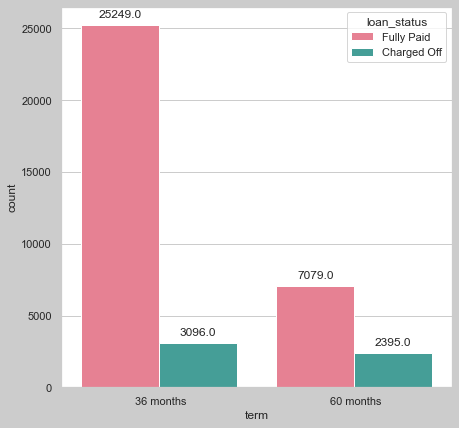

In [150]:
plt.figure(figsize=(7,7),facecolor='0.8')
g = sns.countplot(loans_df.term,data=loans_df,hue='loan_status',palette='husl')
adding_labels(g)
ax.set_title('Loan Paying Term',fontsize=14,color='k')
ax.set_xlabel('Terms',fontsize=14,color = 'k')
ax.set_ylabel('Count',fontsize=14,color = 'k')
plt.show()

**INFERENCE**:
- We can see loans with 60 months tenure have higher defaulters.

##### Univariate Analysis - Unordered Categorical Variables - Home Ownership

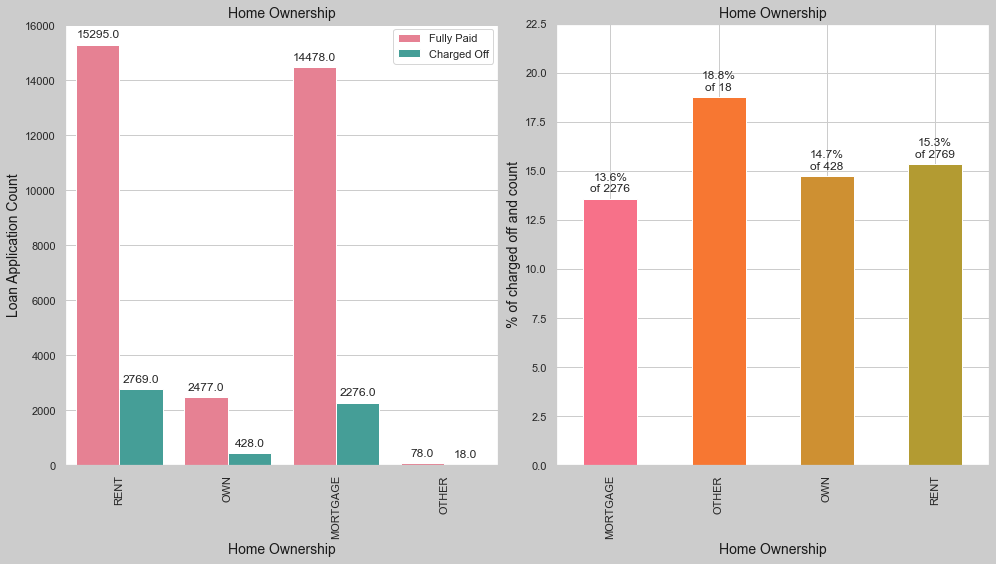

In [151]:
plt.figure(figsize=(14,8),facecolor='0.8')

plt.subplot(1,2,1)
ax = sns.countplot(x="home_ownership",data=loans_df,hue='loan_status',palette='husl')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='k')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'k')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'k') 
plt.xticks(rotation=90)
adding_labels(ax)

plt.subplot(1,2,2)
ax2 = chargedOffPercentagePlot(loans_df,'home_ownership')
ax2.set_title('Home Ownership',fontsize=14,color='k')
ax2.set_xlabel('Home Ownership',fontsize=14,color = 'k')
ax2.set_ylabel('% of charged off and count',fontsize=14,color = 'k') 

plt.show()

**INFERENCE:**
    We see the uniform distribution of charged off among all the categories of Home Ownership.

##### Univariate Analysis - Unordered Categorical Variables - pub_rec_bankruptcies

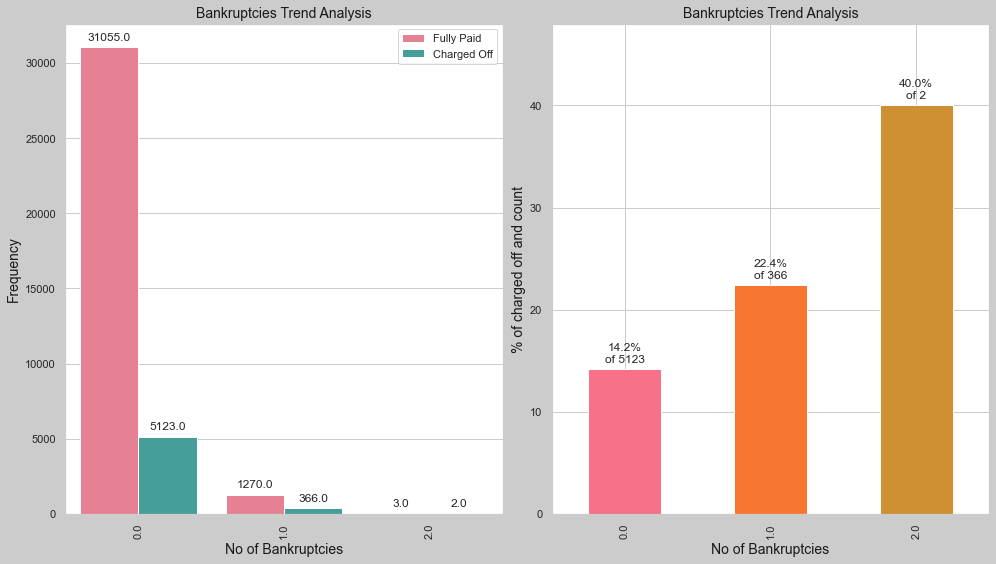

In [152]:
plt.figure(figsize=(14,8),facecolor='0.8')

plt.subplot(1,2,1)
ax = sns.countplot(x="pub_rec_bankruptcies",data=loans_df,hue='loan_status',palette='husl')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Bankruptcies Trend Analysis',fontsize=14,color='k')
ax.set_xlabel('No of Bankruptcies',fontsize=14,color = 'k')
ax.set_ylabel('Frequency',fontsize=14,color = 'k') 
plt.xticks(rotation=90)
adding_labels(ax)

plt.subplot(1,2,2)
ax2 = chargedOffPercentagePlot(loans_df,'pub_rec_bankruptcies')
ax2.set_title('Bankruptcies Trend Analysis',fontsize=14,color='k')
ax2.set_xlabel('No of Bankruptcies',fontsize=14,color = 'k')
ax2.set_ylabel('% of charged off and count',fontsize=14,color = 'k') 

plt.show()

**INFERENCE**:
From the above plots we see an increasing trend in the number of defaulters as the number of Bankruptcies increases.

#### Univariate Analysis - Unordered Categorical Variables - Term

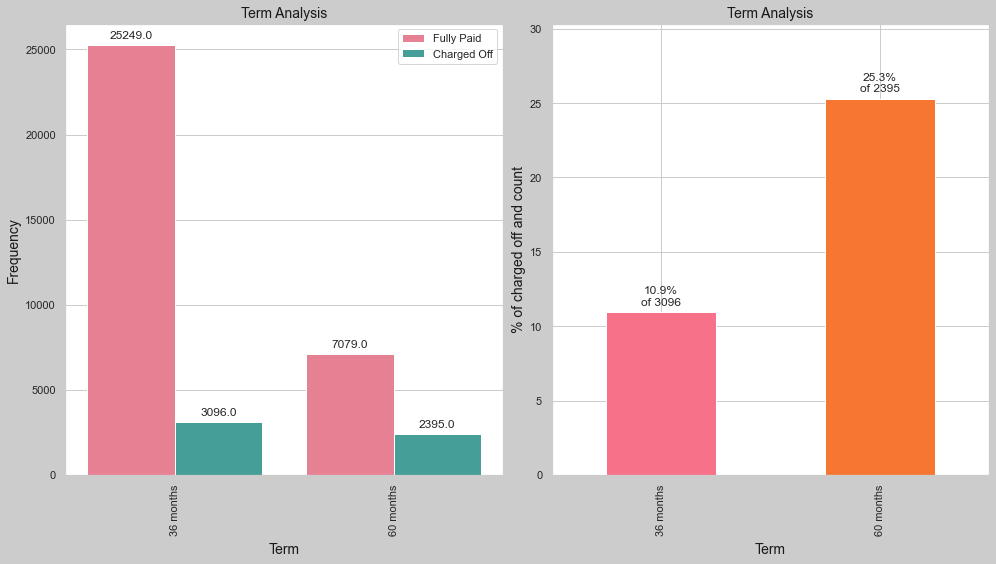

In [153]:
plt.figure(figsize=(14,8),facecolor='0.8')

plt.subplot(1,2,1)
ax = sns.countplot(x="term",data=loans_df,hue='loan_status',palette='husl')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Term Analysis',fontsize=14,color='k')
ax.set_xlabel('Term',fontsize=14,color = 'k')
ax.set_ylabel('Frequency',fontsize=14,color = 'k') 
plt.xticks(rotation=90)
adding_labels(ax)

plt.subplot(1,2,2)
ax2 = chargedOffPercentagePlot(loans_df,'term')
ax2.set_title('Term Analysis',fontsize=14,color='k')
ax2.set_xlabel('Term',fontsize=14,color = 'k')
ax2.set_ylabel('% of charged off and count',fontsize=14,color = 'k') 

plt.show()

**INFERENCE**:
From the above plots we can see there is significantly high percentage of defaulters in the category '60 Months' of term.

In [154]:
loans_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,year,month,salToLoanRatio
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Unknown,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,0.0,2011,12,0.208333
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,0.0,2011,12,0.083333
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Unknown,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,real estate business,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10,0.0,2011,12,0.195886
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21,37,0.0,2011,12,0.203252
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,Nov-04,3,9,0,7963,28.30,12,0.0,2011,12,0.138889


#### Univariate Analysis - Unordered Categorical Variables - 'inq_last_6mths'

In [155]:
loans_df.inq_last_6mths.value_counts()

0    18375
1    10443
2     5540
3     2910
4      307
5      138
6       60
7       34
8       12
Name: inq_last_6mths, dtype: int64

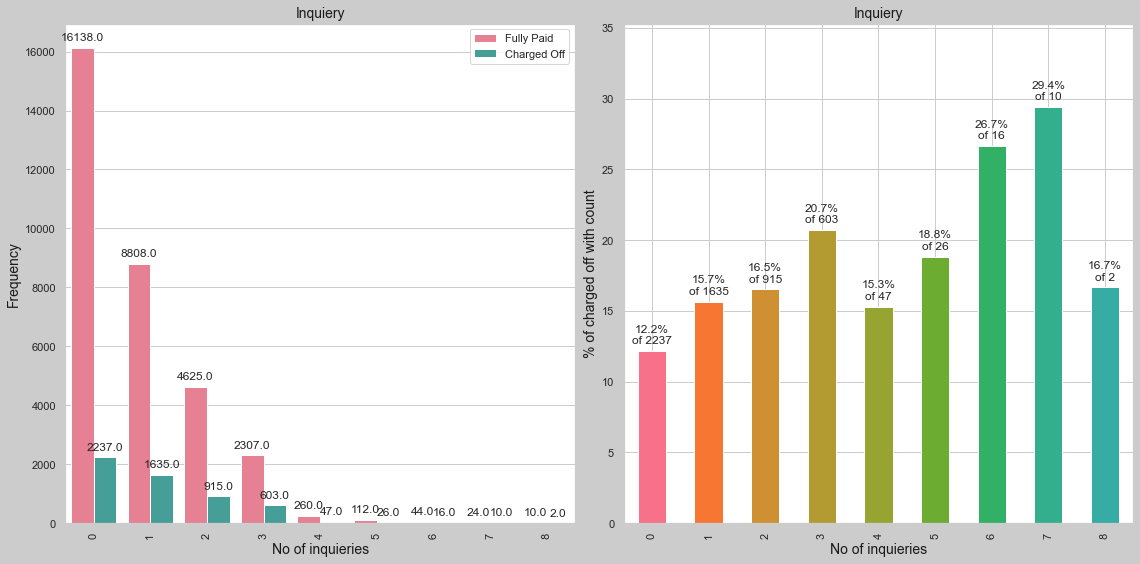

In [156]:
plt.figure(figsize=(16,8),facecolor='0.8')

plt.subplot(1,2,1)
ax = sns.countplot(x="inq_last_6mths",data=loans_df,hue='loan_status',palette='husl')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Inquiery',fontsize=14,color='k')
ax.set_xlabel('No of inquieries',fontsize=14,color = 'k')
ax.set_ylabel('Frequency',fontsize=14,color = 'k') 
plt.xticks(rotation=90)
adding_labels(ax)

plt.subplot(1,2,2)
ax2 = chargedOffPercentagePlot(loans_df,'inq_last_6mths')
ax2.set_title('Inquiery',fontsize=14,color='k')
ax2.set_xlabel('No of inquieries',fontsize=14,color = 'k')
ax2.set_ylabel('% of charged off with count',fontsize=14,color = 'k') 

plt.show()

**INFERENCE**:
From the above plots we can see that there is no significant trend observed for Inquiry.

#### Univariate Analysis - Unordered Categorical Variables - 'grade'

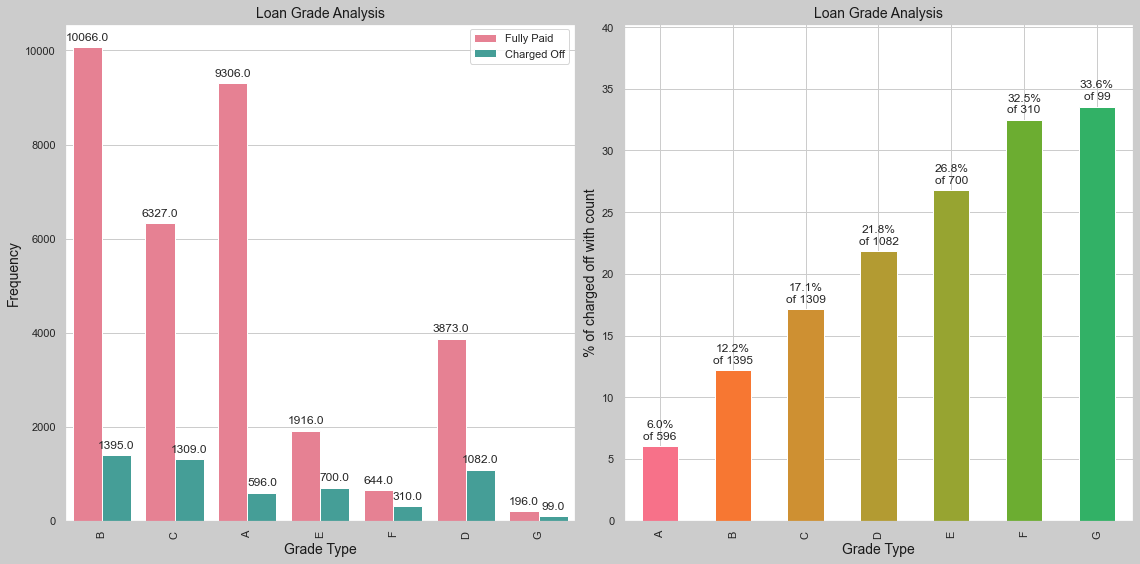

In [157]:
plt.figure(figsize=(16,8),facecolor='0.8')

plt.subplot(1,2,1)
ax = sns.countplot(x="grade",data=loans_df,hue='loan_status',palette='husl')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Loan Grade Analysis',fontsize=14,color='k')
ax.set_xlabel('Grade Type',fontsize=14,color = 'k')
ax.set_ylabel('Frequency',fontsize=14,color = 'k') 
plt.xticks(rotation=90)
adding_labels(ax)

plt.subplot(1,2,2)
ax2 = chargedOffPercentagePlot(loans_df,'grade')
ax2.set_title('Loan Grade Analysis',fontsize=14,color='k')
ax2.set_xlabel('Grade Type',fontsize=14,color = 'k')
ax2.set_ylabel('% of charged off with count',fontsize=14,color = 'k') 

plt.show()

**INFERENCE**:
From the above plots we can see there is an increasing trend of Defaulters observed from A to G Grades.

#### Univariate Analysis - Unordered Categorical Variables - 'sub_grade'

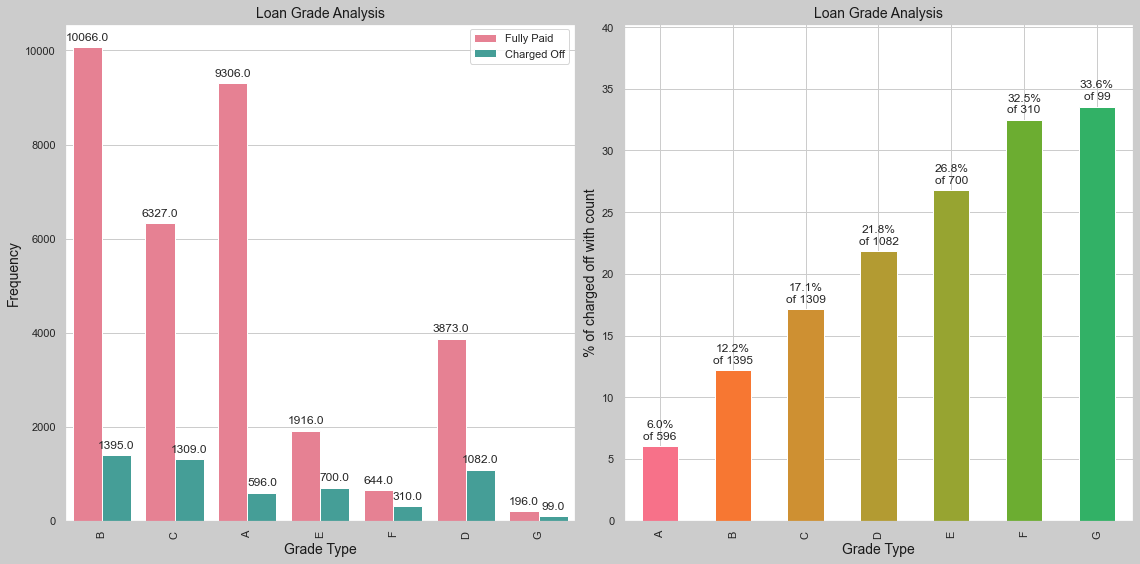

In [158]:
plt.figure(figsize=(16,8),facecolor='0.8')

plt.subplot(1,2,1)
ax = sns.countplot(x="grade",data=loans_df,hue='loan_status',palette='husl')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Loan Grade Analysis',fontsize=14,color='k')
ax.set_xlabel('Grade Type',fontsize=14,color = 'k')
ax.set_ylabel('Frequency',fontsize=14,color = 'k') 
plt.xticks(rotation=90)
adding_labels(ax)

plt.subplot(1,2,2)
ax2 = chargedOffPercentagePlot(loans_df,'grade')
ax2.set_title('Loan Grade Analysis',fontsize=14,color='k')
ax2.set_xlabel('Grade Type',fontsize=14,color = 'k')
ax2.set_ylabel('% of charged off with count',fontsize=14,color = 'k') 

plt.show()

**INFERENCE**
- As grade is the parent class of subgrade, we see similar patterns.

#### Univariate Analysis - Unordered Categorical Variables - 'pub_rec'

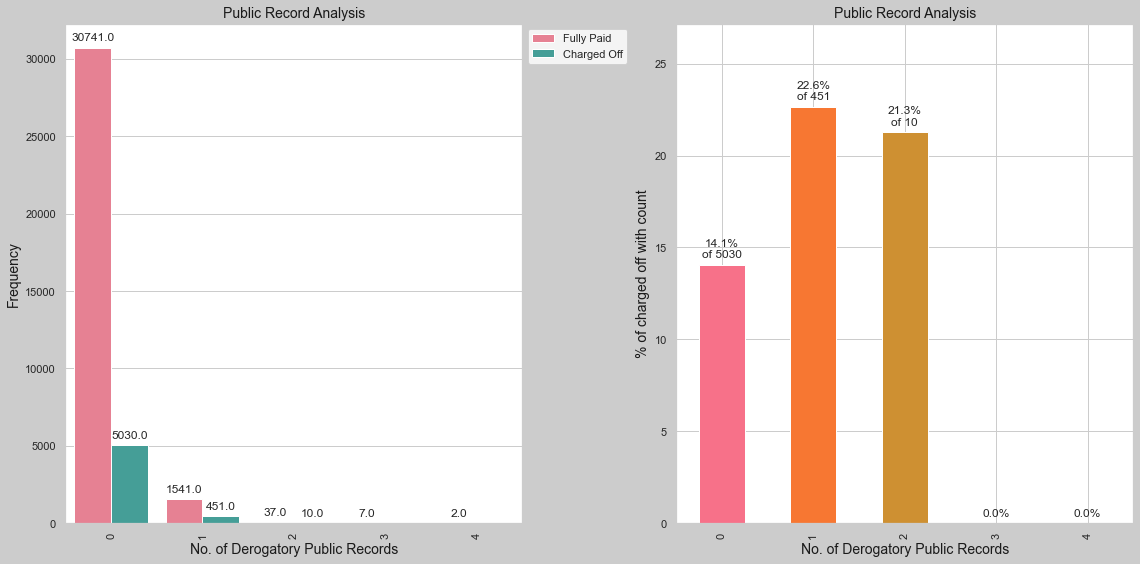

In [159]:
plt.figure(figsize=(16,8),facecolor='0.8')

plt.subplot(1,2,1)
ax = sns.countplot(x="pub_rec",data=loans_df,hue='loan_status',palette='husl')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Public Record Analysis',fontsize=14,color='k')
ax.set_xlabel('No. of Derogatory Public Records',fontsize=14,color = 'k')
ax.set_ylabel('Frequency',fontsize=14,color = 'k') 
plt.xticks(rotation=90)
adding_labels(ax)

plt.subplot(1,2,2)
ax2 = chargedOffPercentagePlot(loans_df,'pub_rec')
ax2.set_title('Public Record Analysis',fontsize=14,color='k')
ax2.set_xlabel('No. of Derogatory Public Records',fontsize=14,color = 'k')
ax2.set_ylabel('% of charged off with count',fontsize=14,color = 'k') 

plt.show()

**Inference -**
An increasing trend is observed between 0 to 2 number of derogatory Public Records.

#### Univariate Analysis - Unordered Categorical Variables - 'verification_status'

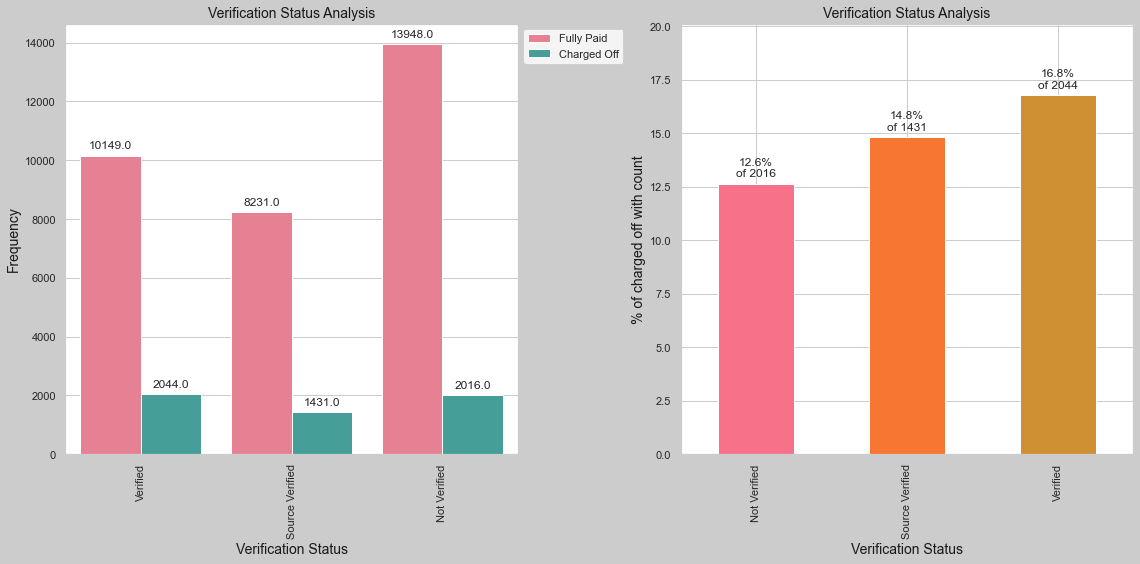

In [160]:
plt.figure(figsize=(16,8),facecolor='0.8')

plt.subplot(1,2,1)
ax = sns.countplot(x="verification_status",data=loans_df,hue='loan_status',palette='husl')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Verification Status Analysis',fontsize=14,color='k')
ax.set_xlabel('Verification Status',fontsize=14,color = 'k')
ax.set_ylabel('Frequency',fontsize=14,color = 'k') 
plt.xticks(rotation=90)
adding_labels(ax)

plt.subplot(1,2,2)
ax2 = chargedOffPercentagePlot(loans_df,'verification_status')
ax2.set_title('Verification Status Analysis',fontsize=14,color='k')
ax2.set_xlabel('Verification Status',fontsize=14,color = 'k')
ax2.set_ylabel('% of charged off with count',fontsize=14,color = 'k') 

plt.show()

**Inference -** Almost similar trend is observed between all the verification statuses, it does not show any effect on the defaulter trend analysis whether Source was verified or not.

In [161]:
loans_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,year,month,salToLoanRatio
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Unknown,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,0.0,2011,12,0.208333
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,0.0,2011,12,0.083333
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Unknown,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,real estate business,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10,0.0,2011,12,0.195886
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21,37,0.0,2011,12,0.203252
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,Nov-04,3,9,0,7963,28.30,12,0.0,2011,12,0.138889


###### Univariate Analysis - Continuous Variables - loan_amnt

In [162]:
loans_df.groupby('loan_status').loan_amnt.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5491.0,12111.75560,8101.732285,1000.0,5600.0,10000.0,16500.0,35000.0
Fully Paid,32328.0,10899.99304,7216.760635,500.0,5275.0,9600.0,15000.0,35000.0


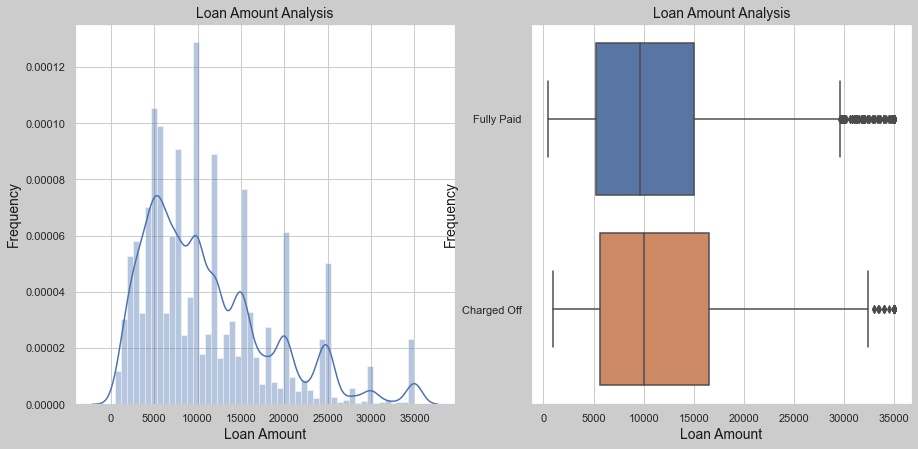

In [163]:
#loan_amt
plt.figure(figsize=(15,7),facecolor='0.8')

plt.subplot(1,2,1)
sns.distplot(x=loans_df.loan_amnt,kde=True)
plt.title('Loan Amount Analysis',fontsize=14,color='k')
plt.xlabel('Loan Amount',fontsize=14,color = 'k')
plt.ylabel('Frequency',fontsize=14,color = 'k') 

plt.subplot(1,2,2)
sns.boxplot(x=loans_df.loan_amnt,y=loans_df.loan_status)
plt.title('Loan Amount Analysis',fontsize=14,color='k')
plt.xlabel('Loan Amount',fontsize=14,color = 'k')
plt.ylabel('Frequency',fontsize=14,color = 'k') 

plt.show()

**INFERENCE**:
- Majority of the loan amount lies in the range 5000 to 15000
- More loans has been taken in multiple of 5000
- We see higher mean and median of loan amount for the people who are in charged off

###### Univariate Analysis - Continuous Variables - funded_amnt

In [164]:
#funded_amt
loans_df.groupby('loan_status').funded_amnt.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5491.0,11758.268075,7769.776953,1000.0,5600.0,10000.0,16000.0,35000.0
Fully Paid,32328.0,10649.235956,6971.177687,500.0,5150.0,9250.0,14600.0,35000.0


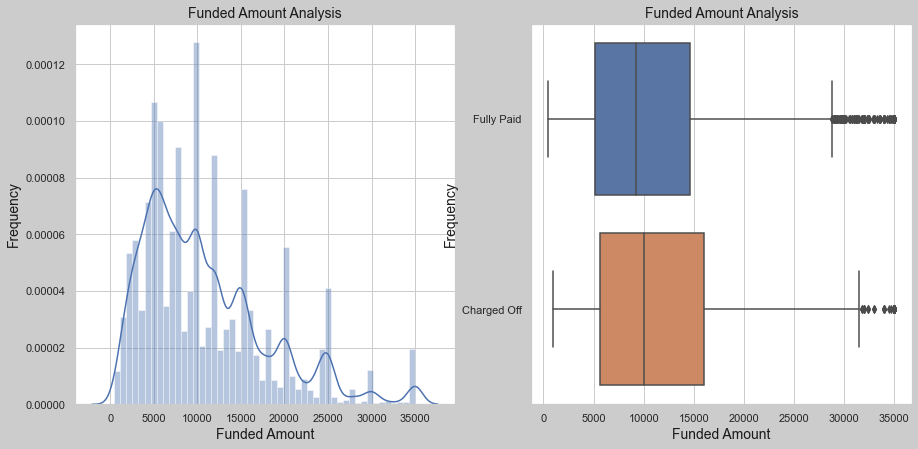

In [165]:
plt.figure(figsize=(15,7),facecolor='0.8')

plt.subplot(1,2,1)
sns.distplot(x=loans_df.funded_amnt,kde=True)
plt.title('Funded Amount Analysis',fontsize=14,color='k')
plt.xlabel('Funded Amount',fontsize=14,color = 'k')
plt.ylabel('Frequency',fontsize=14,color = 'k') 

plt.subplot(1,2,2)
sns.boxplot(x=loans_df.funded_amnt,y=loans_df.loan_status)
plt.title('Funded Amount Analysis',fontsize=14,color='k')
plt.xlabel('Funded Amount',fontsize=14,color = 'k')
plt.ylabel('Frequency',fontsize=14,color = 'k') 

plt.show()

**INFERENCE**:
    - We see similar pattern like loan amount for funded amount

In [166]:
#funded_amt_inv

###### Univariate Analysis - Continuous Variables - funded_amnt_inv

In [167]:
loans_df.groupby('loan_status').funded_amnt_inv.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5491.0,11079.145215,7625.484324,0.0,5000.0,9600.0,15000.0,35000.0
Fully Paid,32328.0,10257.522145,6880.248407,0.0,5000.0,8875.0,14000.0,35000.0


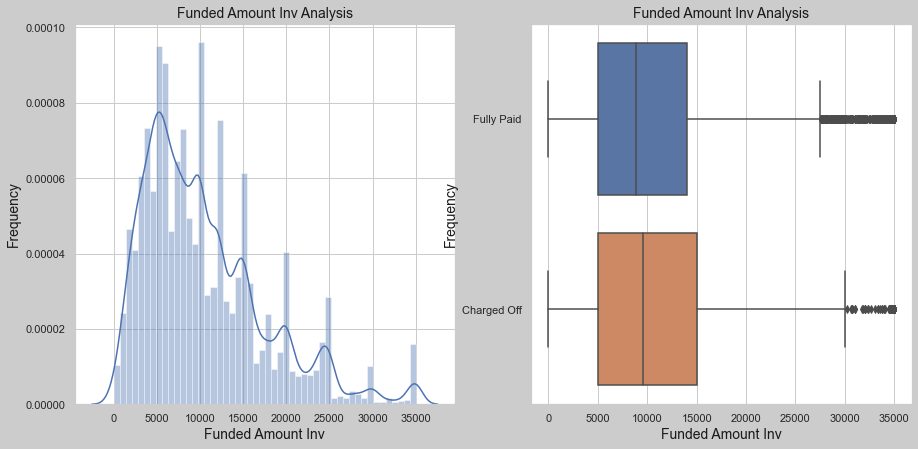

In [168]:
plt.figure(figsize=(15,7),facecolor='0.8')

plt.subplot(1,2,1)
sns.distplot(x=loans_df.funded_amnt_inv,kde=True)
plt.title('Funded Amount Inv Analysis',fontsize=14,color='k')
plt.xlabel('Funded Amount Inv',fontsize=14,color = 'k')
plt.ylabel('Frequency',fontsize=14,color = 'k') 

plt.subplot(1,2,2)
sns.boxplot(x=loans_df.funded_amnt_inv,y=loans_df.loan_status)
plt.title('Funded Amount Inv Analysis',fontsize=14,color='k')
plt.xlabel('Funded Amount Inv',fontsize=14,color = 'k')
plt.ylabel('Frequency',fontsize=14,color = 'k') 

plt.show()

**INFERENCE**:
 Here also it shows similar pattern as loan amount

###### Univariate Analysis - Continuous Variables - int_rate

In [169]:
loans_df.groupby('loan_status').int_rate.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5491.0,13.860016,3.668249,5.42,11.36,13.61,16.45,24.40
Fully Paid,32328.0,11.626268,3.617183,5.42,8.49,11.49,13.99,24.11


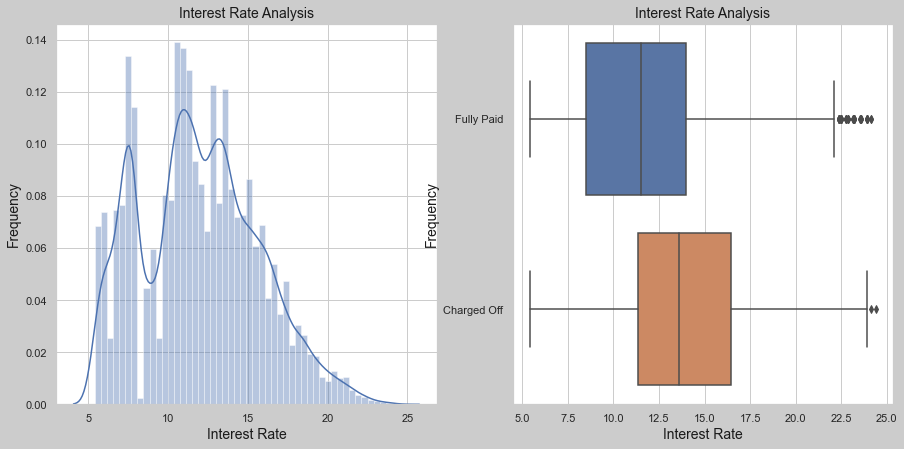

In [170]:
plt.figure(figsize=(15,7),facecolor='0.8')

plt.subplot(1,2,1)
sns.distplot(x=loans_df.int_rate,kde=True)
plt.title('Interest Rate Analysis',fontsize=14,color='k')
plt.xlabel('Interest Rate',fontsize=14,color = 'k')
plt.ylabel('Frequency',fontsize=14,color = 'k') 

plt.subplot(1,2,2)
sns.boxplot(x=loans_df.int_rate,y=loans_df.loan_status)
plt.title('Interest Rate Analysis',fontsize=14,color='k')
plt.xlabel('Interest Rate',fontsize=14,color = 'k')
plt.ylabel('Frequency',fontsize=14,color = 'k') 

plt.show()

**INFERENCE**
- We can clearly see from the above plots that higher interest rate results in higher numbers of defaulters

###### Univariate Analysis - Continuous Variables - installment

In [171]:
loans_df.groupby('loan_status').installment.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5491.0,335.066294,216.155566,22.79,168.62,292.88,454.80,1305.19
Fully Paid,32328.0,320.608879,207.273517,16.08,165.55,276.01,421.74,1295.21


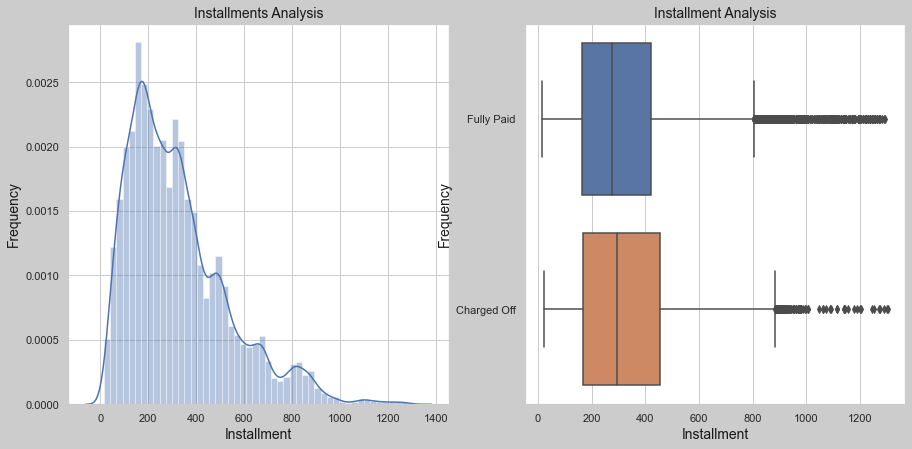

In [172]:
plt.figure(figsize=(15,7),facecolor='0.8')

plt.subplot(1,2,1)
sns.distplot(x=loans_df.installment,kde=True)
plt.title('Installments Analysis',fontsize=14,color='k')
plt.xlabel('Installment',fontsize=14,color = 'k')
plt.ylabel('Frequency',fontsize=14,color = 'k') 

plt.subplot(1,2,2)
sns.boxplot(x=loans_df.installment,y=loans_df.loan_status)
plt.title('Installment Analysis',fontsize=14,color='k')
plt.xlabel('Installment',fontsize=14,color = 'k')
plt.ylabel('Frequency',fontsize=14,color = 'k') 

plt.show()

**INFERENCE**:
- From the above plots we can see high installments have relatively higher number of deafulters.

###### Univariate Analysis - Continuous Variables - annual_inc

In [173]:
loans_df.groupby('loan_status').annual_inc.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5491.0,62338.117654,47396.919711,4080.0,37000.0,53000.0,75000.0,1250000.0
Fully Paid,32328.0,69897.521211,65869.265598,4000.0,41600.0,60000.0,84000.0,6000000.0


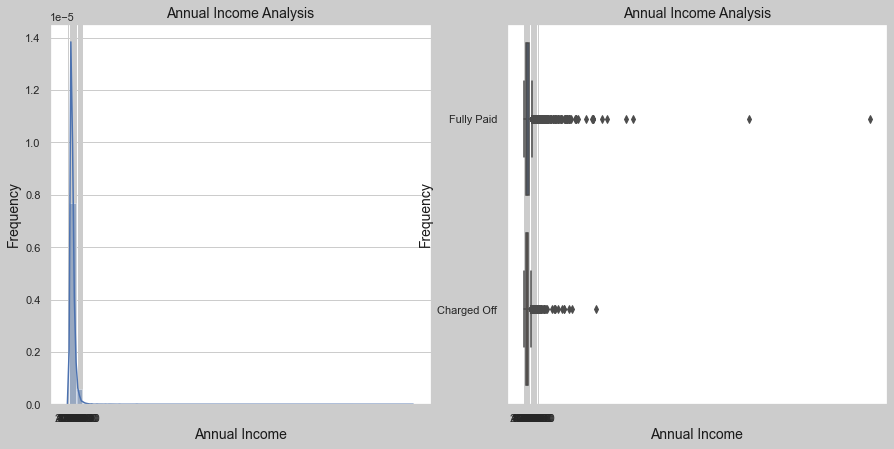

In [174]:
plt.figure(figsize=(15,7),facecolor='0.8')

plt.subplot(1,2,1)
sns.distplot(x=loans_df.annual_inc,kde=True)
plt.title('Annual Income Analysis',fontsize=14,color='k')
plt.xlabel('Annual Income',fontsize=14,color = 'k')
plt.xticks(np.arange(0, 260000, 20000))
plt.ylabel('Frequency',fontsize=14,color = 'k') 

plt.subplot(1,2,2)
sns.boxplot(x=loans_df.annual_inc,y=loans_df.loan_status)
plt.title('Annual Income Analysis',fontsize=14,color='k')
plt.xticks(np.arange(0, 260000, 20000))
plt.xlabel('Annual Income',fontsize=14,color = 'k')
plt.ylabel('Frequency',fontsize=14,color = 'k') 

plt.show()

**INFERENCE**:
- We cannot comment very prcisely the relation between i=annual income and defaulters, we need to analyse Loan/Income ratio.    

###### Univariate Analysis - Continuous Variables - salToLoanRatio

In [175]:
loans_df.groupby('loan_status').salToLoanRatio.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5491.0,0.218708,0.129608,0.005208,0.115385,0.199585,0.300000,0.819672
Fully Paid,32328.0,0.180207,0.111118,0.000789,0.096000,0.158420,0.242424,0.777778


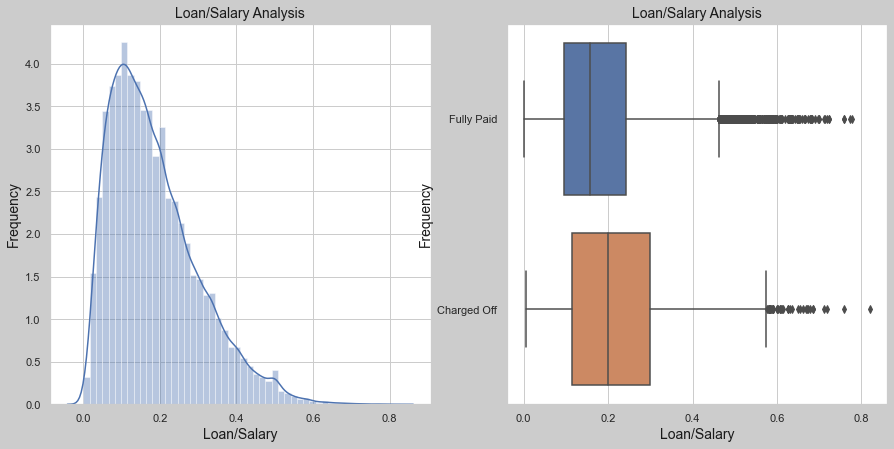

In [176]:
plt.figure(figsize=(15,7),facecolor='0.8')

plt.subplot(1,2,1)
sns.distplot(x=loans_df.salToLoanRatio,kde=True)
plt.title('Loan/Salary Analysis',fontsize=14,color='k')
plt.xlabel('Loan/Salary',fontsize=14,color = 'k')
plt.ylabel('Frequency',fontsize=14,color = 'k') 

plt.subplot(1,2,2)
sns.boxplot(x=loans_df.salToLoanRatio,y=loans_df.loan_status)
plt.title('Loan/Salary Analysis',fontsize=14,color='k')
plt.xlabel('Loan/Salary',fontsize=14,color = 'k')
plt.ylabel('Frequency',fontsize=14,color = 'k') 

plt.show()

**INEFRENCE**:
- From the above plots we can see clearly higher the Loan/Salary Ration, more the numbers of dafaulters

###### Univariate Analysis - Continuous Variables - dti

In [177]:
loans_df.groupby('loan_status').dti.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5491.0,14.047388,6.574123,0.0,9.13,14.34,19.32,29.85
Fully Paid,32328.0,13.198629,6.670032,0.0,8.04,13.24,18.45,29.99


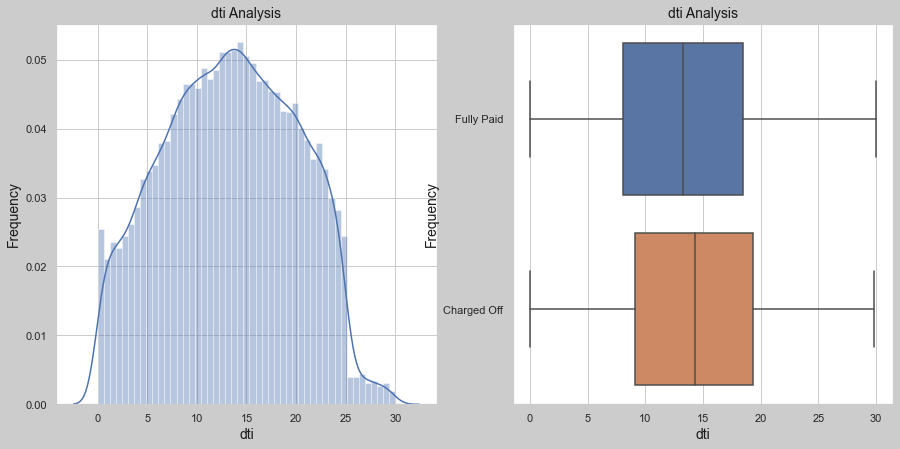

In [178]:
plt.figure(figsize=(15,7),facecolor='0.8')

plt.subplot(1,2,1)
sns.distplot(x=loans_df.dti,kde=True)
plt.title('dti Analysis',fontsize=14,color='k')
plt.xlabel('dti',fontsize=14,color = 'k')
plt.ylabel('Frequency',fontsize=14,color = 'k') 

plt.subplot(1,2,2)
sns.boxplot(x=loans_df.dti,y=loans_df.loan_status)
plt.title('dti Analysis',fontsize=14,color='k')
plt.xlabel('dti',fontsize=14,color = 'k')
plt.ylabel('Frequency',fontsize=14,color = 'k') 

plt.show()

**INFERENCE**:
- From the above plots we can see that the dti is higher in case of the dafaulters.

###### Univariate Analysis - Continuous Variables - revol_bal

In [179]:
loans_df.groupby('loan_status').revol_bal.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5491.0,13538.312147,15078.950729,0.0,4034.0,9256.0,17518.00,147365.0
Fully Paid,32328.0,13261.034336,15945.175841,0.0,3629.0,8706.0,16840.25,149588.0


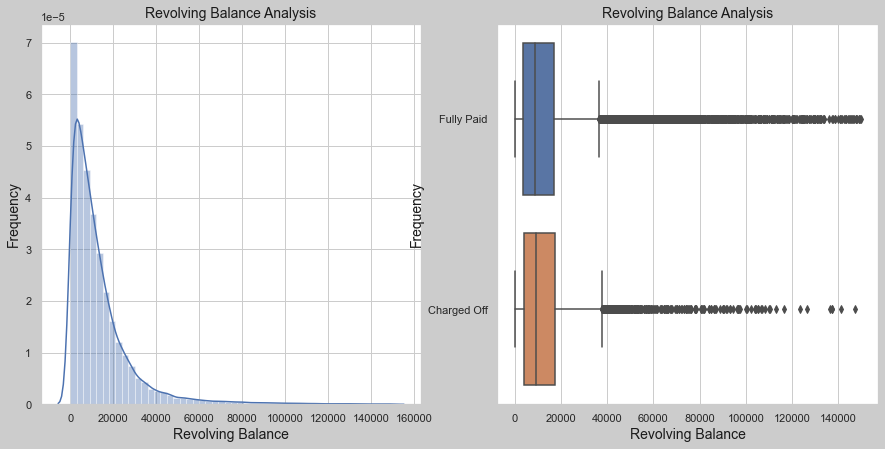

In [180]:
plt.figure(figsize=(15,7),facecolor='0.8')

plt.subplot(1,2,1)
sns.distplot(x=loans_df.revol_bal,kde=True)
plt.title('Revolving Balance Analysis',fontsize=14,color='k')
plt.xlabel('Revolving Balance',fontsize=14,color = 'k')
plt.ylabel('Frequency',fontsize=14,color = 'k') 

plt.subplot(1,2,2)
sns.boxplot(x=loans_df.revol_bal,y=loans_df.loan_status)
plt.title('Revolving Balance Analysis',fontsize=14,color='k')
plt.xlabel('Revolving Balance',fontsize=14,color = 'k')
plt.ylabel('Frequency',fontsize=14,color = 'k') 

plt.show()

**INFERENCE**:
- We dont see any significant relation between Revolving Balance and defaulters

###### Univariate Analysis - Continuous Variables - revol_util

In [181]:
loans_df.revol_util = loans_df.revol_util.astype('float')

In [182]:
loans_df.revol_util.describe()

count    37819.000000
mean        48.828771
std         28.336934
min          0.000000
25%         25.300000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64

In [183]:
loans_df.groupby('loan_status').revol_util.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5491.0,55.738009,27.856503,0.0,34.55,58.70,79.1,99.9
Fully Paid,32328.0,47.655217,28.250763,0.0,24.00,47.75,70.9,99.9


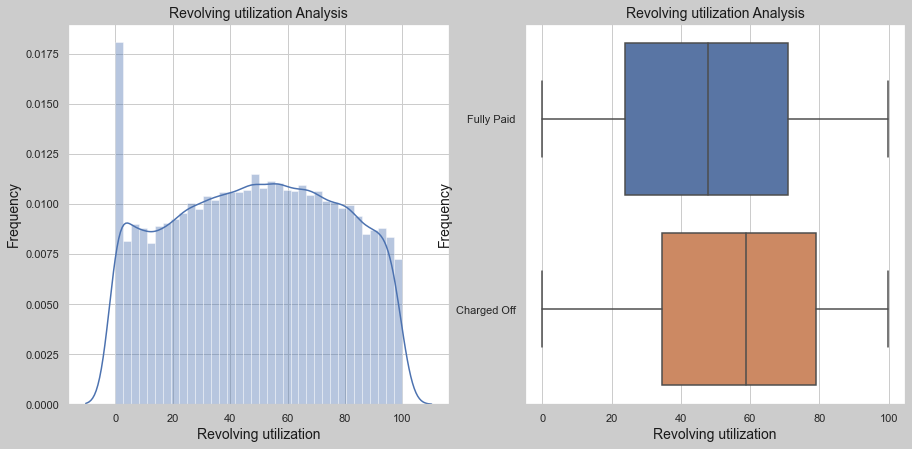

In [184]:
plt.figure(figsize=(15,7),facecolor='0.8')

plt.subplot(1,2,1)
sns.distplot(x=loans_df.revol_util,kde=True)
plt.title('Revolving utilization Analysis',fontsize=14,color='k')
plt.xlabel('Revolving utilization',fontsize=14,color = 'k')
plt.ylabel('Frequency',fontsize=14,color = 'k') 

plt.subplot(1,2,2)
sns.boxplot(x=loans_df.revol_util,y=loans_df.loan_status)
plt.title('Revolving utilization Analysis',fontsize=14,color='k')
plt.xlabel('Revolving utilization',fontsize=14,color = 'k')
plt.ylabel('Frequency',fontsize=14,color = 'k') 

plt.show()

**INFERENCE**:
- From the above plots we can see that the Revolving utilization is higher for the defaulters

# Bivariate Analysis

###### Bivariate Analysis - HeatMap

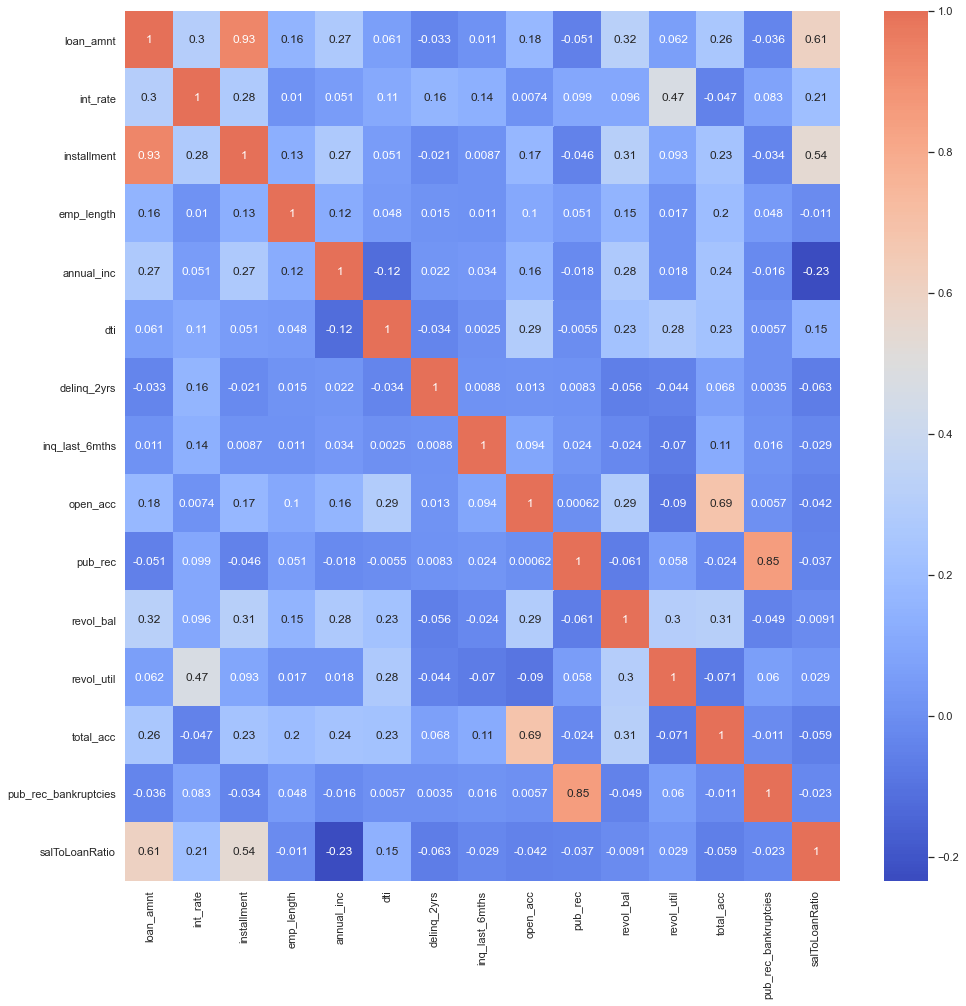

In [185]:
plt.figure(figsize=(16,16))

filter_by= ['loan_amnt', 'int_rate', 'installment',
       'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc','pub_rec_bankruptcies','salToLoanRatio']
corr = loans_df[filter_by].corr()
sns.heatmap(corr,cmap="coolwarm",annot = True,center=0.5)
plt.show()

**INFERENCE**-
From the heatmap, it is observed that 
- Installment is highly correlated to loan amount.Higher the loan, higher will be the installment.
- Public Record Bankruptcies is also highly correlated to the derogatory public records.Higher the number of derogatory records, higher will be the chances of bankruptcies
- Annual Income and DTI seems to be negatively correlated.Lower the annual income, higher will be the debt to income ratio.
- Interest Rate is positively correlated with the borrower's revolving line utilization rate.Higher the revolving line utilization, higher will be the Interest Rate.


#### Bivariate Analysis - numerical vs numerical -  annual_inc vs loan_amount

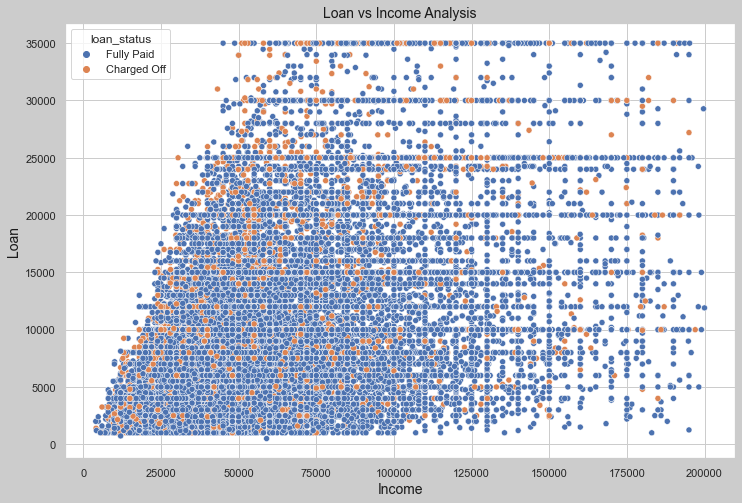

In [186]:
plt.figure(figsize=(12,8),facecolor='0.8')
sns.scatterplot(x='annual_inc',y= 'loan_amnt',data=(loans_df.loc[loans_df['annual_inc']<200000]),hue=loans_df.loan_status)
plt.title('Loan vs Income Analysis',fontsize=14,color='k')
plt.xlabel('Income',fontsize=14,color = 'k')
plt.ylabel('Loan',fontsize=14,color = 'k') 
plt.show()

**INFERENCE**:
- From the above plots we can see the people with higher Income had taken higher loan amount.

#### Bivariate Analysis - numerical vs numerical -  installment vs loan_amount

Text(0, 0.5, 'Loan Amount')

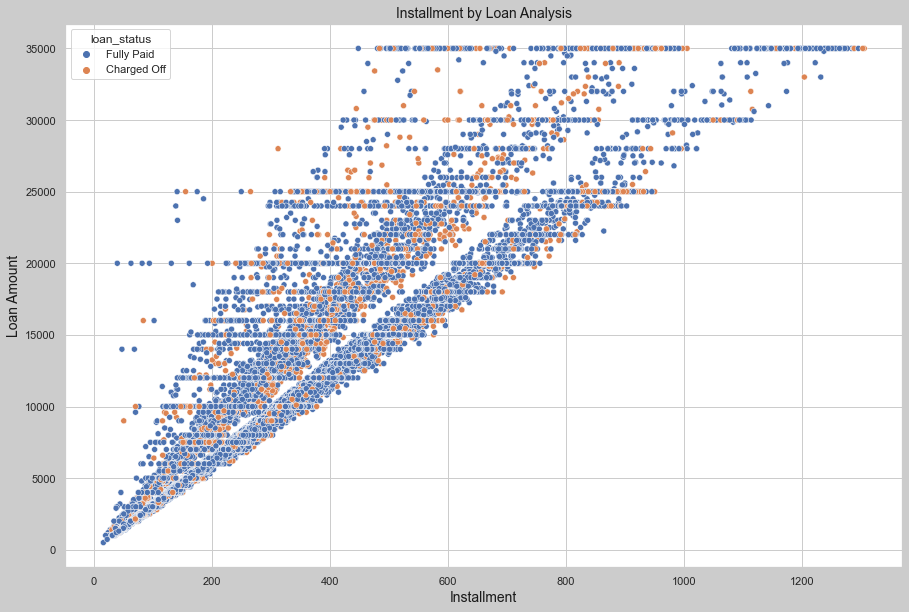

In [187]:
plt.figure(figsize=(15,10),facecolor='0.8')
sns.scatterplot(x='installment',y='loan_amnt',hue='loan_status',data=loans_df)
plt.title('Installment by Loan Analysis',fontsize=14,color='k')
plt.xlabel('Installment',fontsize=14,color = 'k')
plt.ylabel('Loan Amount',fontsize=14,color = 'k') 

**INFERENCE**:
- This is expected trend as installment will be higher for higher loan amount.

#### Bivariate Analysis -numerical vs numerical -  Public Record Bankruptcies vs public records

Text(0, 0.5, 'Public Records')

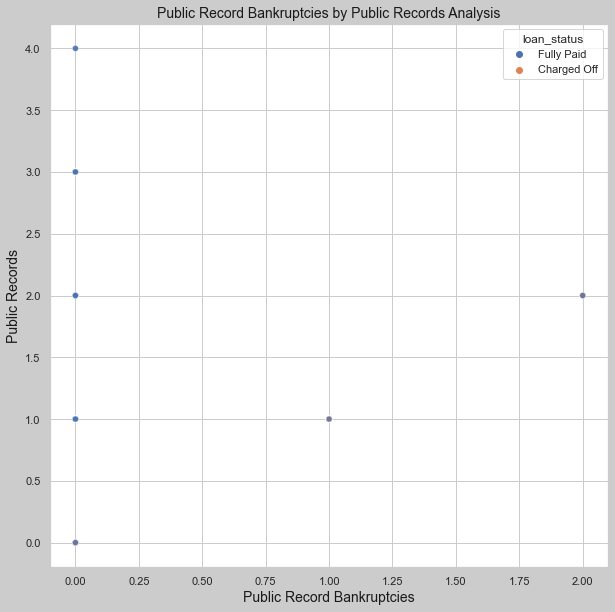

In [188]:
plt.figure(figsize=(10,10),facecolor='0.8')
sns.scatterplot(x='pub_rec_bankruptcies',y='pub_rec',hue='loan_status',data=loans_df,alpha=0.7)
plt.title('Public Record Bankruptcies by Public Records Analysis',fontsize=14,color='k')
plt.xlabel('Public Record Bankruptcies',fontsize=14,color = 'k')
plt.ylabel('Public Records',fontsize=14,color = 'k') 

#### Bivariate Analysis - numerical vs numerical - Annual Income vs DTI

Text(0, 0.5, 'DTI')

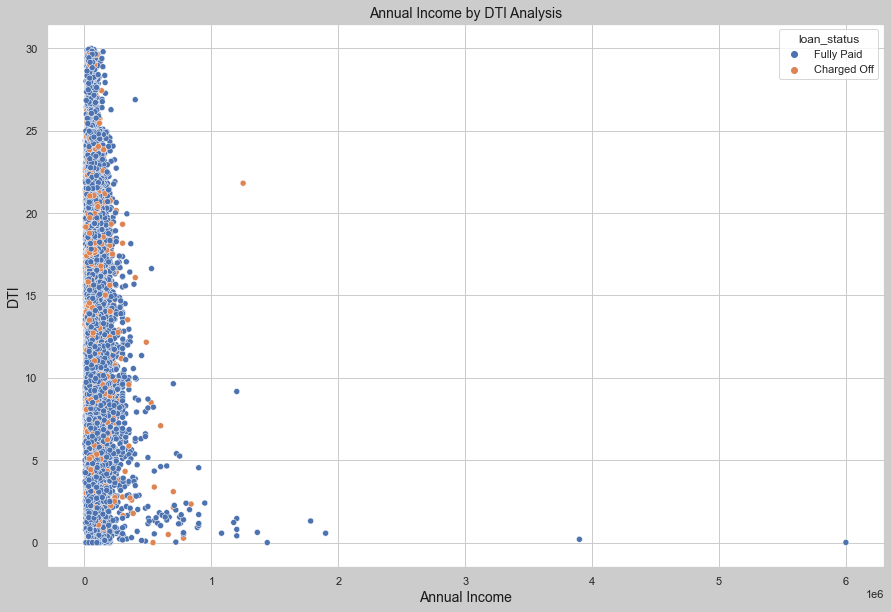

In [189]:
plt.figure(figsize=(15,10),facecolor='0.8')
sns.scatterplot(x='annual_inc',y='dti',hue='loan_status',data=loans_df)
plt.title('Annual Income by DTI Analysis',fontsize=14,color='k')
plt.xlabel('Annual Income',fontsize=14,color = 'k')
plt.ylabel('DTI',fontsize=14,color = 'k') 

#### Bivariate Analysis - numerical vs numerical -  Interest Rate vs Revolving line utilization rate

Text(0, 0.5, 'Revolving Line Utilization Rate')

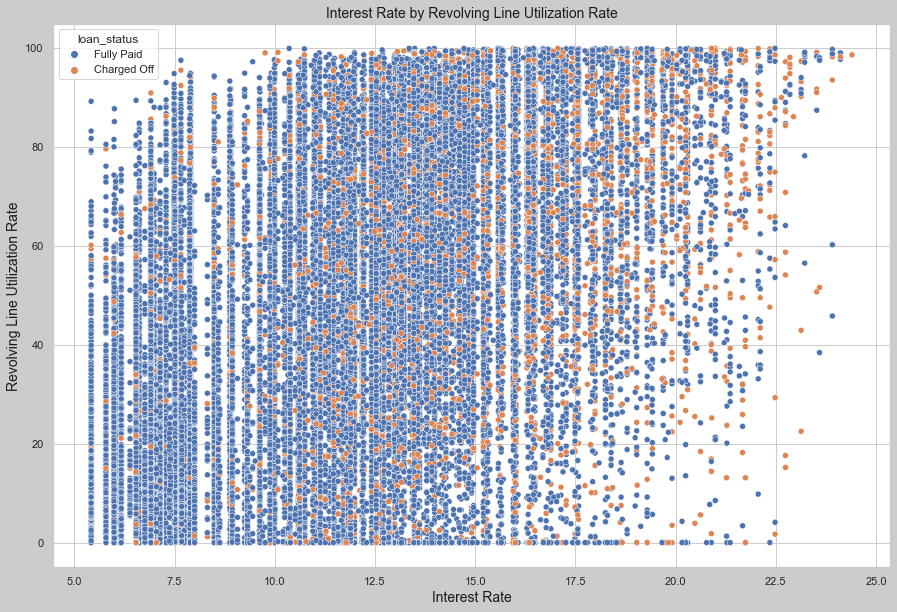

In [190]:
plt.figure(figsize=(15,10),facecolor='0.8')
sns.scatterplot(x='int_rate',y='revol_util',hue='loan_status',data=loans_df)
plt.title('Interest Rate by Revolving Line Utilization Rate',fontsize=14,color='k')
plt.xlabel('Interest Rate',fontsize=14,color = 'k')
plt.ylabel('Revolving Line Utilization Rate',fontsize=14,color = 'k') 

#### Bivariate Analysis - categorical vs numerical -  Home Ownership  vs Interest Rate

Text(0, 0.5, 'Interest Rate')

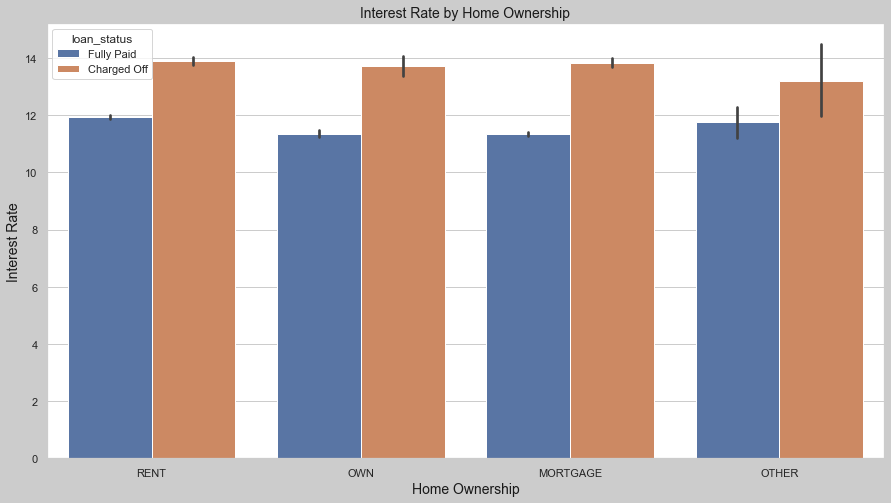

In [191]:
plt.figure(figsize=(15,8),facecolor='0.8')

sns.barplot(x='home_ownership',y='int_rate',hue='loan_status',data=loans_df)
plt.title('Interest Rate by Home Ownership',fontsize=14,color='k')
plt.xlabel('Home Ownership',fontsize=14,color = 'k')
plt.ylabel('Interest Rate',fontsize=14,color = 'k') 

**INFERENCE -**

From the above bar plot we can see that defaulters had taken loan at higher interest for almost all the categories of Home ownership. Mortgage being the highest among them.

#### Bivariate Analysis - categorical vs numerical -  Home Ownership  vs Loan Amount

Text(0, 0.5, 'Loan Amount')

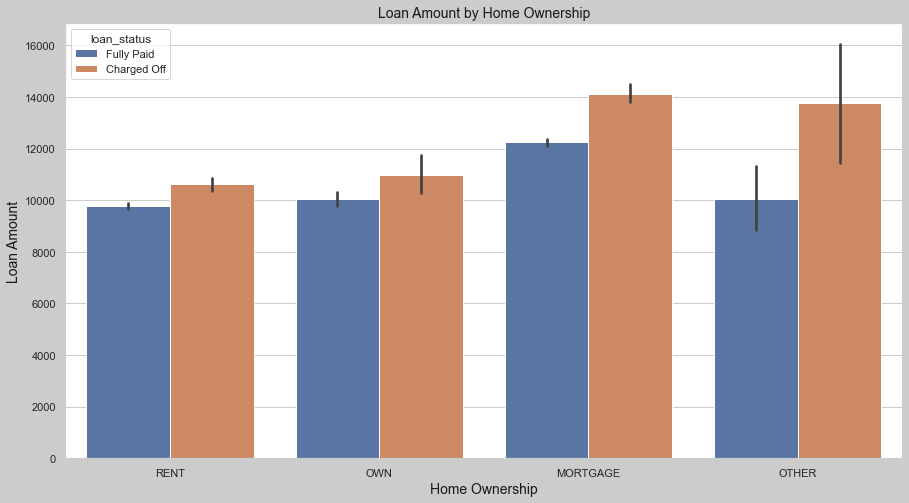

In [192]:
plt.figure(figsize=(15,8),facecolor='0.8')

sns.barplot(x='home_ownership',y='loan_amnt',hue='loan_status',data=loans_df)
plt.title('Loan Amount by Home Ownership',fontsize=14,color='k')
plt.xlabel('Home Ownership',fontsize=14,color = 'k')
plt.ylabel('Loan Amount',fontsize=14,color = 'k') 

**INFERENCE -**

From the above bar plot we can see that defaulters had taken a higher loan amount for all the categories of Home ownership. Mortgage being the highest among them.

#### Bivariate Analysis - categorical vs numerical -  Term  vs Loan Amount

Text(0, 0.5, 'Loan Amount')

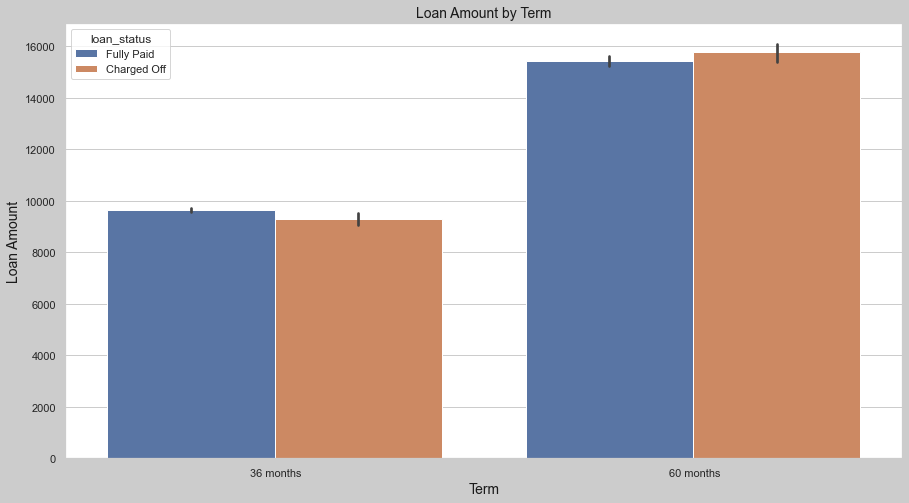

In [193]:
plt.figure(figsize=(15,8),facecolor='0.8')

sns.barplot(x='term',y='loan_amnt',hue='loan_status',data=loans_df)
plt.title('Loan Amount by Term',fontsize=14,color='k')
plt.xlabel('Term',fontsize=14,color = 'k')
plt.ylabel('Loan Amount',fontsize=14,color = 'k') 

**INFERENCE**:
- We can see the loan amount for '60 months' term is much higher resulting higher number of defaulters.

#### Bivariate Analysis - categorical vs numerical -  Term  vs Interest Rate

Text(0, 0.5, 'Interest Rate')

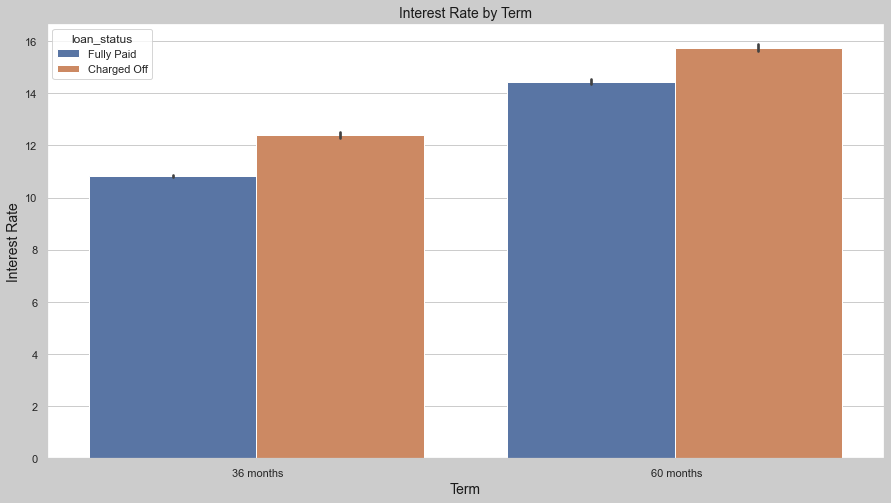

In [194]:
plt.figure(figsize=(15,8),facecolor='0.8')

sns.barplot(x='term',y='int_rate',hue='loan_status',data=loans_df)
plt.title('Interest Rate by Term',fontsize=14,color='k')
plt.xlabel('Term',fontsize=14,color = 'k')
plt.ylabel('Interest Rate',fontsize=14,color = 'k') 

**INFERENCE -**

From the above bar plot we can see that defaulters had taken a loan at higher interest for both the terms.

#### Bivariate Analysis - categorical vs numerical -  Purpose  vs Loan Amount

Text(0, 0.5, 'Loan Amount')

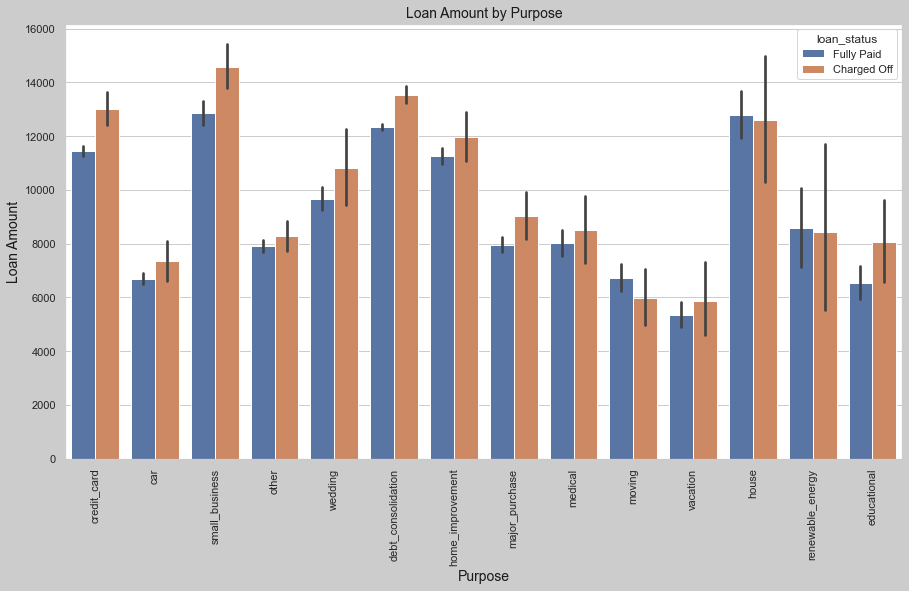

In [195]:
plt.figure(figsize=(15,8),facecolor='0.8')

sns.barplot(x='purpose',y='loan_amnt',hue='loan_status',data=loans_df)
plt.title('Loan Amount by Purpose',fontsize=14,color='k')
plt.xlabel('Purpose',fontsize=14,color = 'k')
plt.xticks(rotation=90)
plt.ylabel('Loan Amount',fontsize=14,color = 'k') 

**INFERENCE -**

From the above bar plot we can see that top 3 purposes where defaulters had taken a higher loan amount were for small business,debt consolidation and credit card.

#### Bivariate Analysis - categorical vs numerical -  Delinquency (in the past two years)  vs Interest Rate

Text(0, 0.5, 'Interest Rate')

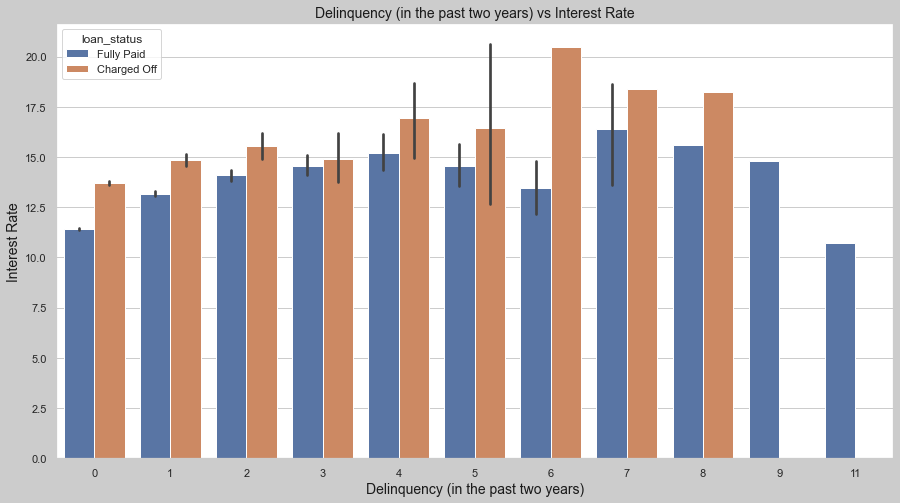

In [196]:
plt.figure(figsize=(15,8),facecolor='0.8')
sns.barplot(x='delinq_2yrs',y='int_rate',hue='loan_status',data=loans_df)
plt.title('Delinquency (in the past two years) vs Interest Rate',fontsize=14,color='k')
plt.xlabel('Delinquency (in the past two years)',fontsize=14,color = 'k')
plt.ylabel('Interest Rate',fontsize=14,color = 'k')

**INFERENCE -**

From the above bar plot we can see that the number of defaulters were highest among people who have crossed their due dates as many as 6 number of times.

#### Bivariate Analysis - categorical vs numerical -  Delinquency (in the past two years)  vs Grade

Text(0, 0.5, 'Delinquency (in the past two years)')

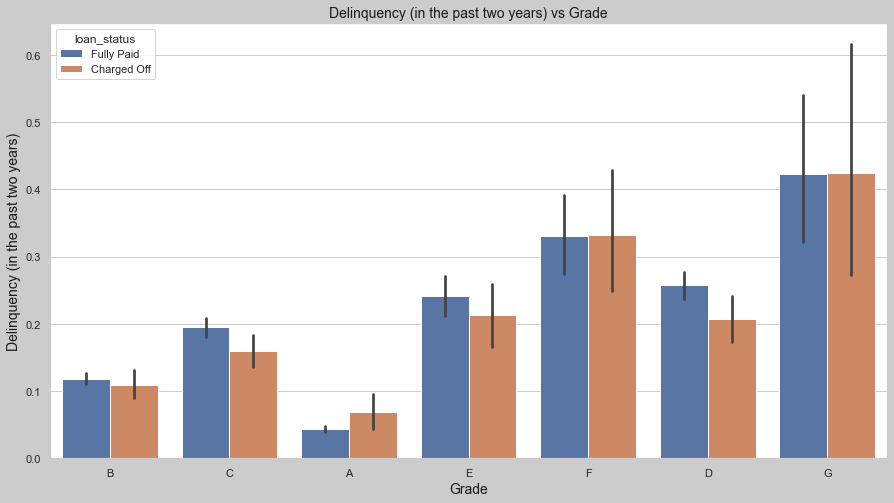

In [197]:
plt.figure(figsize=(15,8),facecolor='0.8')

sns.barplot(x='grade',y='delinq_2yrs',hue='loan_status',data=loans_df)
plt.title('Delinquency (in the past two years) vs Grade',fontsize=14,color='k')
plt.xlabel('Grade',fontsize=14,color = 'k')
plt.ylabel('Delinquency (in the past two years)',fontsize=14,color = 'k')

**INFERENCE -**

From the above bar plot we can see that the number of defaulters seems to be high in F and G grades with high delinquency in the past two years.

#### Bivariate Analysis - categorical vs numerical -  Grade vs Loan Amount

Text(0, 0.5, 'Loan Amount')

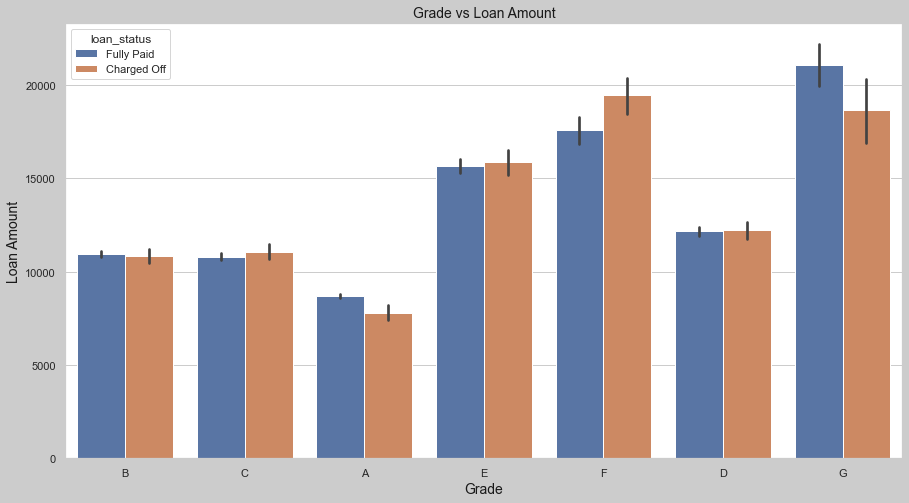

In [198]:
plt.figure(figsize=(15,8),facecolor='0.8')

sns.barplot(x='grade',y='loan_amnt',hue='loan_status',data=loans_df)
plt.title('Grade vs Loan Amount',fontsize=14,color='k')
plt.xlabel('Grade',fontsize=14,color = 'k')
plt.ylabel('Loan Amount',fontsize=14,color = 'k')

**INFERENCE -**

As observed from the above plot,as the loan amount is high for E and F Grades, we can slo see the Grades E and F are at high risk to be having more number of defaulters than Fully Paid ones.

#### Bivariate Analysis - categorical vs numerical -  Open Account vs DTI

Text(0, 0.5, 'DTI')

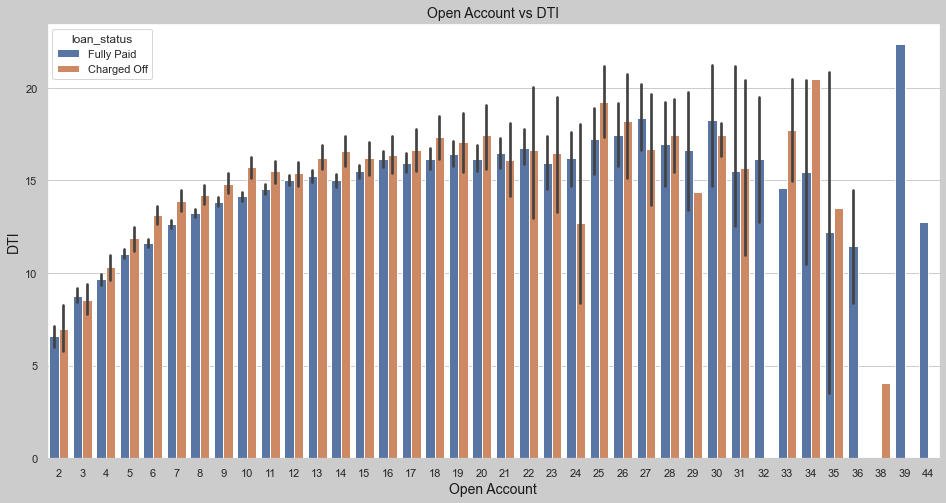

In [199]:
plt.figure(figsize=(16,8),facecolor='0.8')

sns.barplot(x='open_acc',y='dti',hue='loan_status',data=loans_df)
plt.title('Open Account vs DTI',fontsize=14,color='k')
plt.xlabel('Open Account',fontsize=14,color = 'k')
plt.ylabel('DTI',fontsize=14,color = 'k')

**INFERENCE** -
We can see that the above barplot shows an increasing trend on an average - as the number of open account increases,the debt to income ratio also increases.